In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreadsbooks/books.csv


In [2]:
books_dataset = pd.read_csv('/kaggle/input/goodreadsbooks/books.csv',error_bad_lines=False)
books_dataset.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
books_dataset.shape

(11123, 12)

In [4]:
books_dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
books_dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

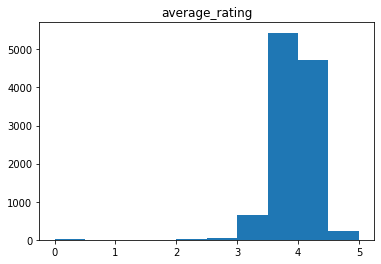

In [6]:
# plotting histograms for numerical variables
import matplotlib.pyplot as plt

numericals = books_dataset[['average_rating']]

for i in numericals.columns:
    plt.hist(numericals[i])
    plt.title(i)
    plt.show()

In [7]:
auth_df = books_dataset.groupby(['authors']).mean()[['average_rating']]
auth_df

,average_rating
authors,
A.B. Yehoshua/Hillel Halkin,3.600
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky,3.760
A.E. Cunningham/Harlan Ellison/Charles F. Miller/Terry Dowling/Paul Rhoads/Jack Vance/Tom Shippey/Gene Wolfe/David Langford/Dan Simmons/David Mathew,4.150
A.J. Jacobs,3.760
A.M. Homes,3.280
...,...
Émile Zola/Henri Mitterand,4.060
Émile Zola/Robert Lethbridge/Elinor Dorday,4.010
Émile Zola/Robin Buss/Brian Nelson,3.990


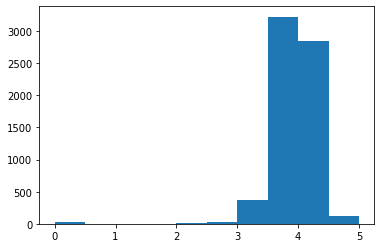

In [8]:
plt.hist(auth_df['average_rating'])
plt.show()

In [9]:
import re 
pattern = '/'
authors_rating = books_dataset[['authors','average_rating']]

def split_auths(str):
    strs = re.split('/',str)
    return strs 
authors = authors_rating['authors'].apply(split_auths)
authors 

0                            [J.K. Rowling, Mary GrandPré]
1                            [J.K. Rowling, Mary GrandPré]
2                                           [J.K. Rowling]
3                            [J.K. Rowling, Mary GrandPré]
4                            [J.K. Rowling, Mary GrandPré]
                               ...                        
11118    [William T. Vollmann, Larry McCaffery, Michael...
11119                                [William T. Vollmann]
11120                                [William T. Vollmann]
11121                                [William T. Vollmann]
11122                                         [Mark Twain]
Name: authors, Length: 11123, dtype: object

In [10]:
ratings = authors_rating['average_rating']
ratings

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11118    4.06
11119    4.08
11120    3.96
11121    3.72
11122    3.91
Name: average_rating, Length: 11123, dtype: float64

In [11]:
author_numbers = authors.apply(lambda x:len(x))
author_numbers

0        2
1        2
2        1
3        2
4        2
        ..
11118    3
11119    1
11120    1
11121    1
11122    1
Name: authors, Length: 11123, dtype: int64